# import all needed lib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1 : load the dataset

In [4]:
irisData = datasets.load_iris()
xData = irisData.data
yData = irisData.target
featureNames = irisData.feature_names
targetNames = irisData.target_names

# put into dataframe so we can see it better
dataSet = pd.DataFrame(xData, columns=featureNames)
dataSet["target"] = yData

# Step 2 : normalize our data for better accuracy

In [5]:
scaler = StandardScaler()
xScaled = scaler.fit_transform(xData)

# Step 3 : split train and test

In [6]:
xTrain, xTest, yTrain, yTest = train_test_split(
    xScaled, yData, test_size=0.25, random_state=42, stratify=yData
)

# Step 4 : try many k value and check which one best

Best Accuracy = 0.9737 when K = 9


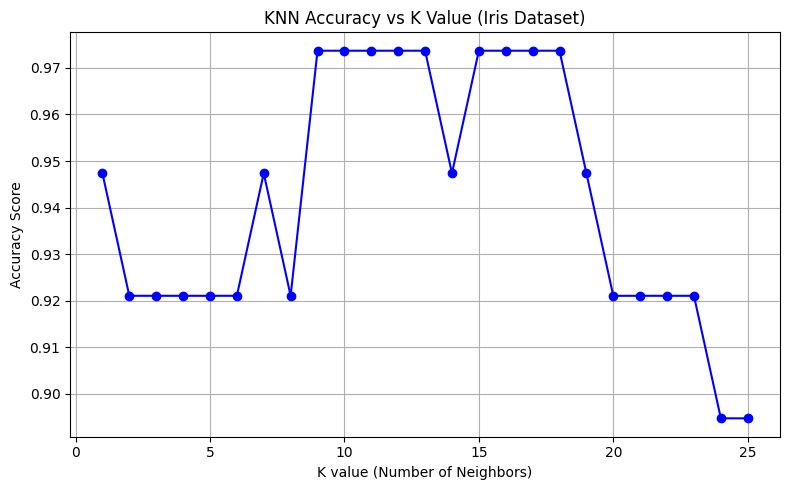

In [7]:
kRange = range(1, 26)
accuracyList = []

for k in kRange:
    knnModel = KNeighborsClassifier(n_neighbors=k)
    knnModel.fit(xTrain, yTrain)
    yPredict = knnModel.predict(xTest)
    acc = accuracy_score(yTest, yPredict)
    accuracyList.append(acc)

bestAcc = max(accuracyList)
bestK = [k for k, a in zip(kRange, accuracyList) if a == bestAcc][0]

print(f"Best Accuracy = {bestAcc:.4f} when K = {bestK}")

# plot accuracy vs k to see which k work nice
plt.figure(figsize=(8, 5))
plt.plot(kRange, accuracyList, marker='o', color='blue')
plt.xlabel("K value (Number of Neighbors)")
plt.ylabel("Accuracy Score")
plt.title("KNN Accuracy vs K Value (Iris Dataset)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Step 5 : train final model with best K and test it


Final Accuracy for K = 9: 0.9737

Confusion Matrix:
[[12  0  0]
 [ 0 13  0]
 [ 0  1 12]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



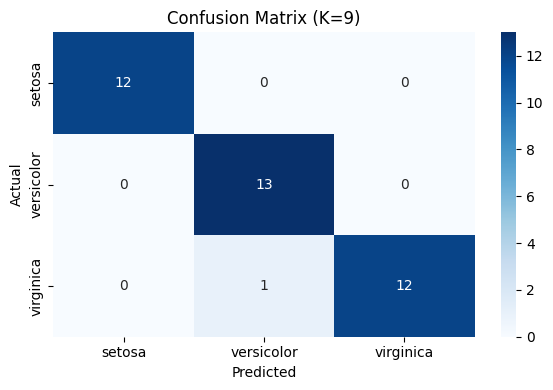

In [8]:
finalModel = KNeighborsClassifier(n_neighbors=bestK)
finalModel.fit(xTrain, yTrain)
finalPredict = finalModel.predict(xTest)

finalAcc = accuracy_score(yTest, finalPredict)
confMatrix = confusion_matrix(yTest, finalPredict)
report = classification_report(yTest, finalPredict, target_names=targetNames)

print(f"\nFinal Accuracy for K = {bestK}: {finalAcc:.4f}")
print("\nConfusion Matrix:")
print(confMatrix)
print("\nClassification Report:")
print(report)

# heatmap for confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confMatrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=targetNames, yticklabels=targetNames)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (K={bestK})")
plt.tight_layout()
plt.show()

# Step 6 : show decision boundary for two feature (0,1)

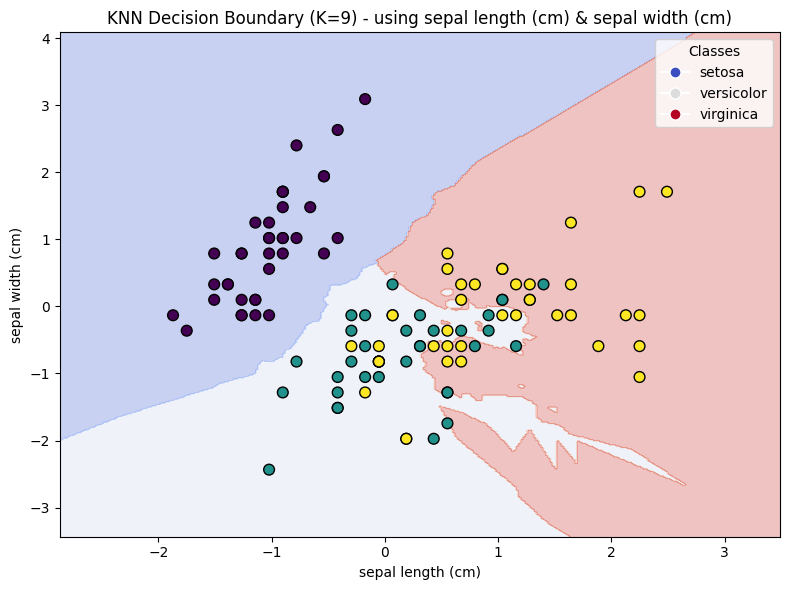

In [10]:
f1, f2 = 0, 1
xTwo = xData[:, [f1, f2]]
xTwoScaled = scaler.fit_transform(xTwo)

# split data again for 2d show
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(
    xTwoScaled, yData, test_size=0.25, random_state=42, stratify=yData
)

# train new model only for 2 feature view
knn2D = KNeighborsClassifier(n_neighbors=bestK)
knn2D.fit(xTrain2, yTrain2)

# make grid for boundary region
step = 0.02
xMin, xMax = xTwoScaled[:, 0].min() - 1, xTwoScaled[:, 0].max() + 1
yMin, yMax = xTwoScaled[:, 1].min() - 1, xTwoScaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xMin, xMax, step),
                     np.arange(yMin, yMax, step))

gridData = np.c_[xx.ravel(), yy.ravel()]
zz = knn2D.predict(gridData)
zz = zz.reshape(xx.shape)

# draw decision boundary area
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, zz, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(xTrain2[:, 0], xTrain2[:, 1], c=yTrain2, edgecolor="k", s=60)
plt.xlabel(featureNames[f1])
plt.ylabel(featureNames[f2])
plt.title(f"KNN Decision Boundary (K={bestK}) - using {featureNames[f1]} & {featureNames[f2]}")

# make legend manually so no error come
from matplotlib.lines import Line2D
colors = plt.cm.coolwarm(np.linspace(0, 1, len(targetNames)))
customLegend = [Line2D([0], [0], marker='o', color='w',
                       markerfacecolor=colors[i], markersize=8,
                       label=targetNames[i]) for i in range(len(targetNames))]
plt.legend(handles=customLegend, title="Classes", loc="upper right")

plt.tight_layout()
plt.show()

# Step 7 : just print some test prediction

In [11]:
print("Some sample test predictions:")
for i in range(min(10, len(xTest))):
    predLab = finalModel.predict([xTest[i]])[0]
    trueLab = yTest[i]
    print(f"{i+1:2d}) True = {targetNames[trueLab]:10s} | Predict = {targetNames[predLab]:10s}")

print("\nTask 6 KNN complete - all working good.")

Some sample test predictions:
 1) True = setosa     | Predict = setosa    
 2) True = versicolor | Predict = versicolor
 3) True = versicolor | Predict = versicolor
 4) True = versicolor | Predict = versicolor
 5) True = setosa     | Predict = setosa    
 6) True = versicolor | Predict = versicolor
 7) True = virginica  | Predict = virginica 
 8) True = virginica  | Predict = virginica 
 9) True = virginica  | Predict = virginica 
10) True = virginica  | Predict = virginica 

Task 6 KNN complete - all working good.
